<a href="https://colab.research.google.com/github/byrongomezjr/AAPLStockForecastingWithLSTM/blob/main/AAPLStockForecastingWithLSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset

In [2]:
#load dataset
from google.colab import files
dataset = files.upload()

Saving AAPL.csv to AAPL.csv


In [20]:
df = pd.read_csv('AAPL.csv')

In [21]:
df.shape

(2393, 7)

In [22]:
df = df['Open'].values
df = df.reshape(-1,1)

In [23]:
df.shape

(2393, 1)

In [24]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

print(dataset_train.shape)
print(dataset_test.shape)

(1914, 1)
(479, 1)


#importing the model

In [25]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

#scaling data

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.04706981],
       [0.04585156],
       [0.0459415 ],
       [0.06216872],
       [0.05994212]])

In [27]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[1.00257149],
       [1.01335586],
       [1.04274407],
       [1.03639408],
       [1.02978177]])

In [28]:
def create_dataset(df):
  x = []
  y = []
  for i in range(50, df.shape[0]):
    x.append(df[i-50:i, 0])
    y.append(df[i, 0])
  x = np.array(x)
  y = np.array(y)
  return x,y

# Creating datasets

In [29]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

#LSTM model

In [30]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

#Reshaping features for LSTM layer

In [31]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
model.compile(loss='mean_squared_error', optimizer='adam')

# Start training

In [33]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('AAPL_stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 18s 167ms/step - loss: 0.0070
Epoch 2/50
59/59 [==============================] - 10s 169ms/step - loss: 0.0016
Epoch 3/50
59/59 [==============================] - 13s 230ms/step - loss: 0.0015
Epoch 4/50
59/59 [==============================] - 10s 166ms/step - loss: 0.0013
Epoch 5/50
59/59 [==============================] - 10s 169ms/step - loss: 0.0012
Epoch 6/50
59/59 [==============================] - 10s 170ms/step - loss: 0.0011
Epoch 7/50
59/59 [==============================] - 11s 185ms/step - loss: 0.0011
Epoch 8/50
59/59 [==============================] - 10s 167ms/step - loss: 8.8296e-04
Epoch 9/50
59/59 [==============================] - 10s 171ms/step - loss: 9.2879e-04
Epoch 10/50
59/59 [==============================] - 10s 168ms/step - loss: 9.4242e-04
Epoch 11/50
59/59 [==============================] - 10s 168ms/step - loss: 0.0011
Epoch 12/50
59/59 [==============================] - 10s 165ms/step - loss: 8.5795e-

#loading our model

In [34]:
model = load_model('AAPL_stock_prediction.h5')

#Data visualization

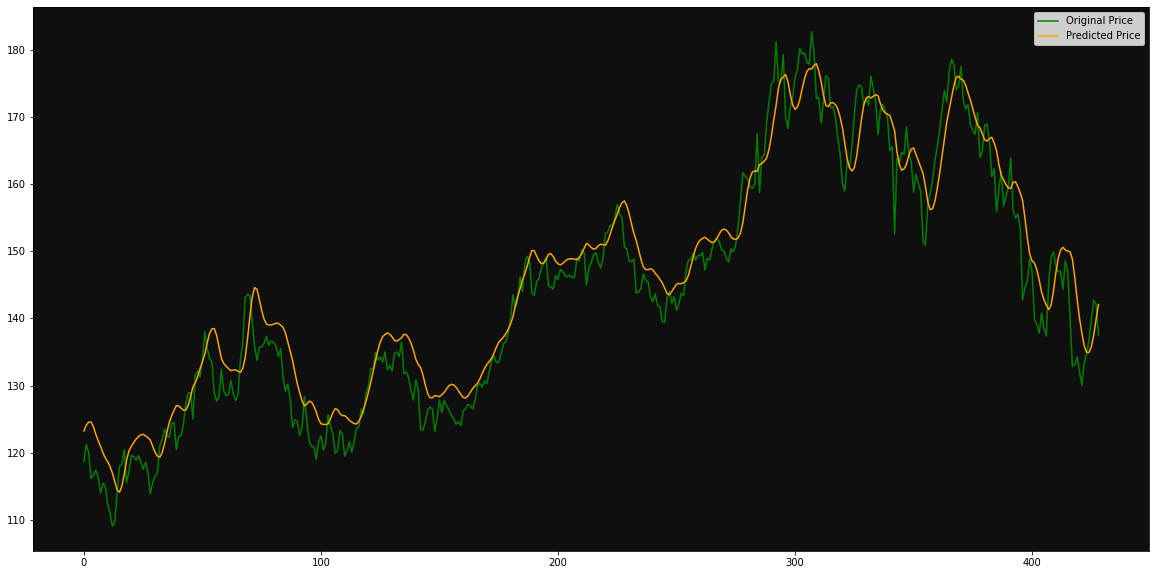

In [35]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('#0f0f0f')
ax.plot(y_test_scaled, color='green', label='Original Price')
plt.plot(predictions, color='orange', label='Predicted Price')
plt.legend()